In [3]:
#imports 
import numpy as np

# STEP 1

In [4]:
#setting seeds for reproducibility, so results of random number generation are the same whenever run
np.random.seed(42)

#step1
#constructing 2 10x10 matrices with random number entries
matrix1 = np.float32(np.random.random((10, 10)))
matrix2 = np.float32(np.random.random((10, 10)))


In [5]:
#defining our matrix multiplication function

def matrix_multiply(u, v):
    m, n = u.shape
    n, p = v.shape
    res = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            res[i,j] = 0
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res


In [35]:
t3= %timeit -o -n 50 -r 5 matrix_multiply(matrix1,matrix2)
print(f'The time required for matrix_multiply is: {t3.average}')

664 µs ± 25.6 µs per loop (mean ± std. dev. of 5 runs, 50 loops each)
The time required for matrix_multiply is: 0.0006636127037927509


In [37]:
t1= %timeit -o -n 50 -r 5 matrix1@matrix2
print(f'The time required for u@v is: {t1.average}')

2.27 µs ± 615 ns per loop (mean ± std. dev. of 5 runs, 50 loops each)
The time required for u@v is: 2.2664042189717296e-06


In [36]:
t2= %timeit -o -n 50 -r 5 np.matmul(matrix1,matrix2)
print(f'The time required np.matmul is: {t3.average}')

2.38 µs ± 1.4 µs per loop (mean ± std. dev. of 5 runs, 50 loops each)
The time required np.matmul is: 0.0006636127037927509


## Total multiplications:
- When we multiply 2 matrices of shapes mxn and nxp, the total number of multiplications are given by m * n * p
here, m=n=p=10, hence, the total number of multiplications are given by 10 * 10 * 10=1000

- Now, total number of floating point operations is equal to twice the number of multiplications, hence number of floating point operations = 2000



In [9]:
#Number of FLOPS can be written as (number of floating point operations)/time taken per operation
n_flops= 2000 /t1.average
print(f'The number of GFLOPS for u@v are: {round(n_flops/10**9,3)}')

n_flops_2=2000 /t2.average
print(f'The number of GFLOPS for np.matmul are: {round(n_flops_2/10**9,3)}')

n_flops_3=2000 /t3.average
print(f'The number of GFLOPS for matrix_multiply are: {round(n_flops_3/10**9,3)}')


The number of GFLOPS for u@v are: 0.771
The number of GFLOPS for np.matmul are: 0.841
The number of GFLOPS for matrix_multiply are: 0.003


# STEP 2


In [10]:
import subprocess

In [11]:
output=subprocess.check_output(['lscpu'],text=True)
print(output)


Architecture:                       x86_64
CPU op-mode(s):                     32-bit, 64-bit
Byte Order:                         Little Endian
Address sizes:                      40 bits physical, 48 bits virtual
CPU(s):                             16
On-line CPU(s) list:                0-15
Thread(s) per core:                 1
Core(s) per socket:                 16
Socket(s):                          1
NUMA node(s):                       1
Vendor ID:                          GenuineIntel
CPU family:                         15
Model:                              6
Model name:                         Common KVM processor
Stepping:                           1
CPU MHz:                            2099.998
BogoMIPS:                           4199.99
Hypervisor vendor:                  KVM
Virtualization type:                full
L1d cache:                          512 KiB
L1i cache:                          512 KiB
L2 cache:                           64 MiB
L3 cache:                      

- As we can see from our above code, the maximum operating frequency of our CPU is **2099.998 MHz**, this means 2099.998 clock cycles occur per second, which mean 2099.998* 10** 6 floating point operations occur per second, hence the number of GFLOPS are 2.099.
- Comparing it with our previous answers for GFLOPS of around 1.087 for np.matmul and 0.0016 for our inbuilt function, we see that the GFLOPS are much greater.
- We therefore see a difference in the theoretical number of GFLOPs, vs the actual obtained values of the GFLOPS

- GFLOPS is technically a characteristic of the processor, and in ideal conditions, it should be a constant value for a given processor. However, real-world performance can vary due to factors like memory access patterns, cache utilization, parallelization, and other optimizations employed by the software, making GFLOPS values fluctuate in practice.



# STEP 3

In [39]:
mat1 = np.float32(np.random.random((20, 20)))
mat2 = np.float32(np.random.random((20, 20)))

In [40]:
%timeit -n 50 -r 5 matrix_multiply(mat1,mat2)

4.78 ms ± 67.2 µs per loop (mean ± std. dev. of 5 runs, 50 loops each)


In [41]:
t1= %timeit -n 50 -r 5 matrix1@matrix2

The slowest run took 4.67 times longer than the fastest. This could mean that an intermediate result is being cached.
2.85 µs ± 2.41 µs per loop (mean ± std. dev. of 5 runs, 50 loops each)


In [42]:
t2= %timeit -n 50 -r 5 np.matmul(matrix1,matrix2)

1.93 µs ± 467 ns per loop (mean ± std. dev. of 5 runs, 50 loops each)


## Graphs

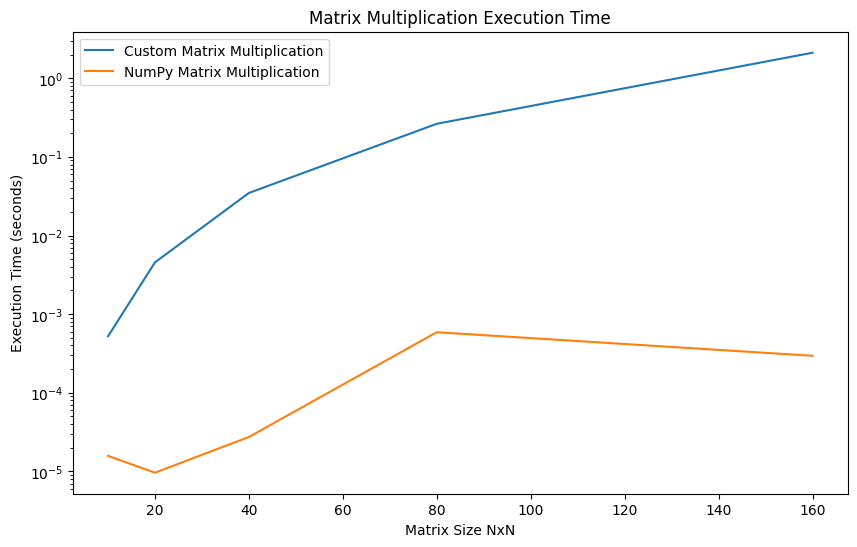

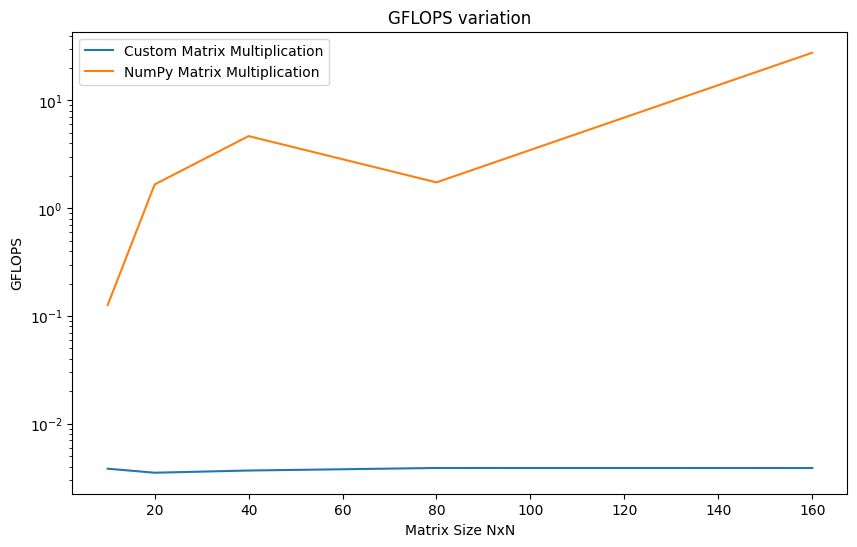

In [43]:
import timeit
import numpy as np
import matplotlib.pyplot as plt

# Initialize empty lists to store measured times
custom_times = []
numpy_times = []
gflops_c=[]
gflops_n=[]

# Define the initial matrix size and the number of repetitions
matrix_size = 10 # Initial matrix size

# Repeat the measurement with doubling matrix sizes
for i in range(1,6): 
    # Limit matrix size to 10240 for this example
    # Create random matrices of the current size
    np.random.seed(42)
    A = np.random.rand(matrix_size, matrix_size)
    B = np.random.rand(matrix_size, matrix_size)

    # Measure custom matrix multiplication
    custom_time = %timeit -o -n 2 -r 2 -q matrix_multiply(A,B)
    custom_time = custom_time.average
    

    # Measure NumPy matrix multiplication
    numpy_time = %timeit -o -n 2 -r 2 -q np.matmul(A,B) 
    numpy_time = numpy_time.average

    # Append measured times to the lists
    custom_times.append(custom_time)
    numpy_times.append(numpy_time)
    gflops_c.append(2*10**-9*(matrix_size)**3/custom_time)
    gflops_n.append(2*10**-9*(matrix_size)**3/numpy_time)

    # Double the matrix size for the next run
    matrix_size*=2

# Plot the measured times
x_vals=[10,20,40,80,160]
plt.figure(figsize=(10, 6))
plt.plot(x_vals,custom_times, label="Custom Matrix Multiplication")
plt.plot(x_vals,numpy_times, label="NumPy Matrix Multiplication")
plt.xlabel("Matrix Size NxN")
plt.ylabel("Execution Time (seconds)")
plt.yscale('log')  # Use a log scale for the y-axis
plt.legend()
plt.title("Matrix Multiplication Execution Time")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(x_vals,gflops_c, label="Custom Matrix Multiplication")
plt.plot(x_vals,gflops_n, label="NumPy Matrix Multiplication")
plt.xlabel("Matrix Size NxN")
plt.ylabel("GFLOPS")
plt.yscale('log')  # Use a log scale for the y-axis
plt.legend()
plt.title("GFLOPS variation")
plt.show()

## Graph screenshots
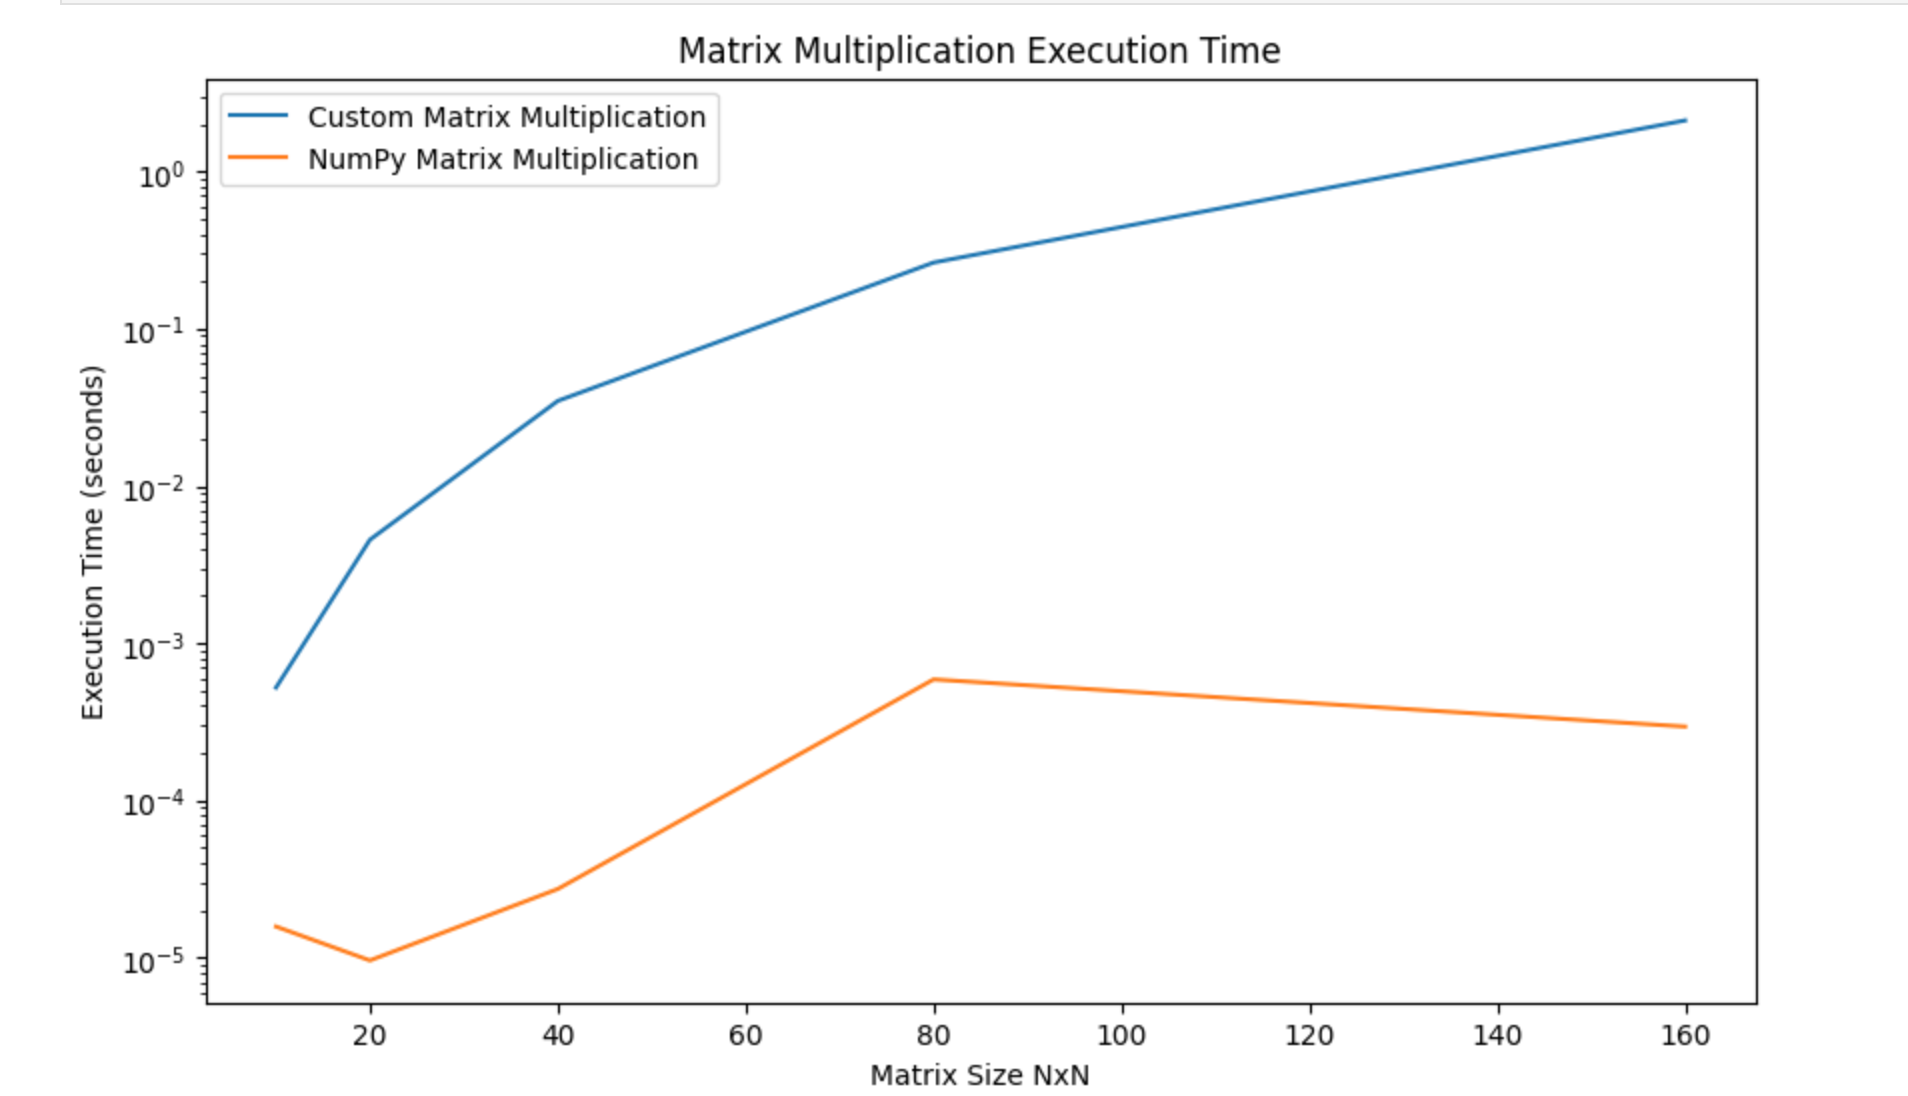
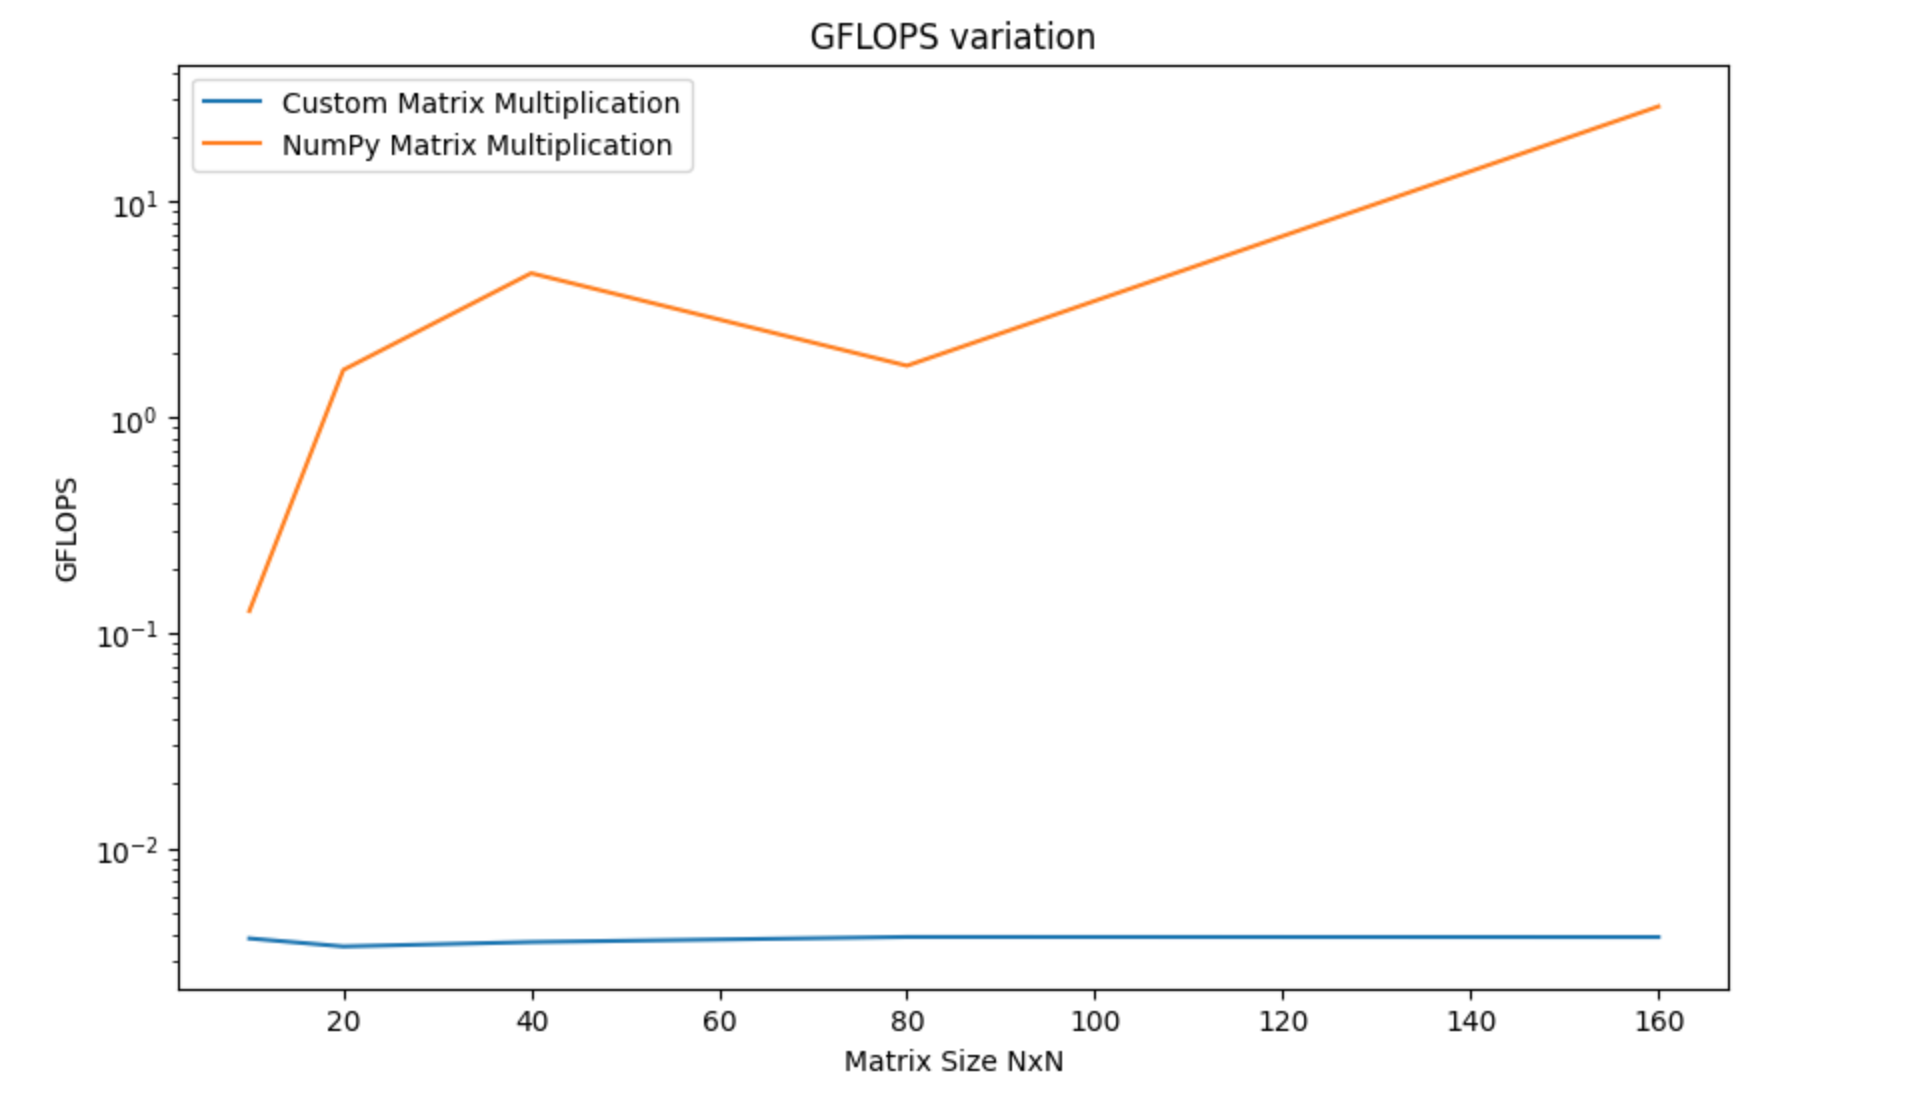


## Graph explanation

- We expect the GFLOPs to remain constant as we change the size of the matrix
- This is becuase we expect the GFLOPs to be equal to the operating frequency of the CPU
- We see in our graph for the matrix_multiply that, although the GFLOPs are not equal to our processor frequency, it still remains almost constant as we vary the size of our matrix. 
- We attribute this constancy to the fact that as we change our matrix size, our execution time, as well as the number of floating point operations, both are proportional to the cube of the matrix size
- We see that for np.matmul, this is not the case. 
- In the case of np.matmul, the influence of parallelization and optimization libraries may indeed behave differently as the array size increases. This is because the efficiency and benefits of such optimizations can be influenced by various factors, including the specific operations being performed and the data size.
- On the other hand, FMA is a feature found in modern CPUs like Intel's AVX instruction set, which allows a single instruction to combine both multiplication and addition (or subtraction) into a single operation. This leads to improved performance and efficiency, reducing the number of instructions required for these operations from two to one.
- In our code as we see above however, we take the number of floating point operations to be 2. (Addition and multiplication) As we increase the array size, this assumption will no longer hold true. This explains why the GFLOPS graph for np.matmul shows its irregular pattern.  

How far can we increase size upto?

- We keep doubling the matrix size until the execution time goes into seconds, and the notebook hangs
- By trial and error, I kept increasing my execution time upto a matrix size of 160 x 160, beyond which the execution time goes into seconds, and the notebook hangs

# STEP 4

In [18]:
%load_ext Cython

In [38]:
%%cython

import numpy as np
import cython

def cy_matmul(float[:,:] u, float[:,:] v, float[:,:] res):
    cdef int m, n, p
    cdef int i, j, k
    m = u.shape[0]
    n = u.shape[1]
    p = v.shape[1]
    for i in range(m):
        for j in range(p):
            res[i,j] = 0
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res


In [20]:
u = np.float32(np.random.random((50,50)))
v = np.float32(np.random.random((50,50)))
res = np.zeros((50, 50), dtype=np.float32)
t_cy=%timeit -o -n 1 -r 1 -q cy_matmul(u, v, res)
t_py=%timeit -o -n 1 -r 1 -q matrix_multiply(u, v)
print(f'The time taken by our cython function is: {t_cy.average}')
print(f'The time taken by the normal python function is: {t_py.average}')

The time taken by our cython function is: 0.00035294797271490097
The time taken by the normal python function is: 0.08142351603601128


## Explanation

- We can see that the time taken by the cython function is much lesser. 
- This is because, cython uses several optimisations to decrease the time taken
- cython removes the need for typecasting, since we define the datatypes being used
- cython further is makes it a compiled language, instead of an interpreted one

# STEP 5

Let us apply each transformation as a step, and measure the time taken

Transformation-1: Declaring the variables as int 

In [21]:
%%cython
import numpy as np

def matrix_multiply_c(u, v):
    
    cdef int m, n, p
    cdef int i, j, k
    m = u.shape[0]
    n = u.shape[1]
    p = v.shape[1]
    res = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            res[i,j] = 0
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res


In [22]:
u = np.float32(np.random.random((50,50)))
v = np.float32(np.random.random((50,50)))


In [23]:
t_t1=%timeit -o -n 1 -r 1 -q matrix_multiply_c(u, v)
print(f'The time taken by the first transformation- declaring int is: {t_t1.average}')

The time taken by the first transformation- declaring int is: 0.06651143007911742


Second transformation- setting boundscheck to False

In [24]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [25]:
%%cython
import cython
import numpy as np


@cython.boundscheck(False)
def matrix_multiply_c2(u, v):
    m = u.shape[0]
    n = u.shape[1]
    p = v.shape[1]
    res = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            res[i,j] = 0
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res


In [26]:
t_t2=%timeit -o -n 1 -r 1 -q matrix_multiply_c2(u, v)
print(f'The time taken by the second transformation- removing boundscheck is: {t_t2.average}')

The time taken by the second transformation- removing boundscheck is: 0.06815947708673775


Third transformation-setting double dtypes

In [27]:
%%cython
import cython
import numpy as np


def cy_matmul_3(double[:,:] u, double[:,:] v, double[:,:] res):
    m = u.shape[0]
    n = u.shape[1]
    p = v.shape[1]
    res = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            res[i,j] = 0
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res


In [28]:
u2 = np.double(np.random.random((50,50)))
v2= np.double(np.random.random((50,50)))
res2 = np.zeros((50, 50), dtype=np.double)

In [29]:
t_t3=%timeit -o -n 1 -r 1 -q cy_matmul_3(u2, v2,res2)
print(f'The time taken by the thrid transformation- setting double is: {t_t3.average}')

The time taken by the thrid transformation- setting double is: 0.00032108393497765064


4th transformation- setting dtype float

In [30]:
%%cython
import cython
import numpy as np


def cy_matmul_f(float[:,:] u, float[:,:] v, float[:,:] res):
    m = u.shape[0]
    n = u.shape[1]
    p = v.shape[1]
    #res = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            res[i,j] = 0
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res


In [31]:
uf = np.float32(np.random.random((50,50)))
vf = np.float32(np.random.random((50,50)))
resf = np.zeros((50, 50), dtype=np.float32)

In [32]:
t_t4=%timeit -o -n 1 -r 1 -q cy_matmul_f(uf, vf,resf)
print(f'The time taken by the fourth transformation- setting float is: {t_t4.average}')

The time taken by the fourth transformation- setting float is: 0.00028744200244545937


In [33]:
t_t5=%timeit -o -n 1 -r 1 -q u@v
print(f'The time taken by u@v is: {t_t5.average}')

The time taken by u@v is: 0.00015909201465547085


## Inferences from the code
- We can see that the best result is the step when we change the datatypes to float
- The time taken for u@v is still the least, it is of the order e-5, whereas our best optimisation to cython is of the order e-4
- These times are comparable
- This proves cython optimisations significantly reduce the time taken for our code to run